In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Hack/training_set_features.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
df.shape

(26707, 36)

In [ ]:
df.drop('respondent_id', axis=1, inplace=True)

In [ ]:
df['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [ ]:
df_label = pd.read_csv('/content/drive/MyDrive/Data Hack/training_set_labels.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data Hack/test_set_features.csv')

In [ ]:
#add df and df_lable
df_final = pd.concat([df, df_label], axis=1)

In [ ]:
df_final.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


<Axes: >

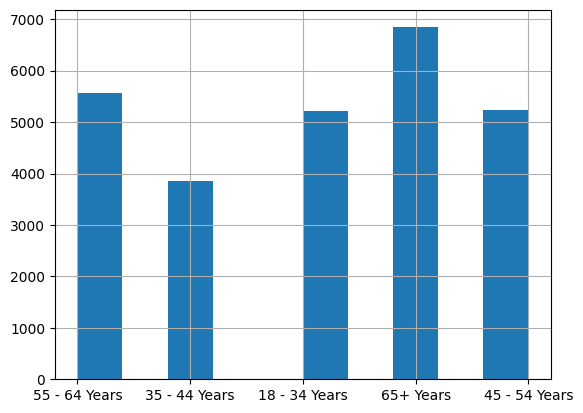

In [ ]:
#plot a histogram between age and xyz vaccine
df_final['age_group'].hist()

In [ ]:
#find toal null values in each coloumn
df_final.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
df_final.describe()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


In [ ]:
#find mode of xyz concern
df_final['xyz_concern'].mode()

0    2.0
Name: xyz_concern, dtype: float64

In [ ]:
#replace missing values in xyz concern with it's mode
#df_final['xyz_concern'].fillna(df_final['xyz_concern'].mode()[0], inplace=True)

<Axes: >

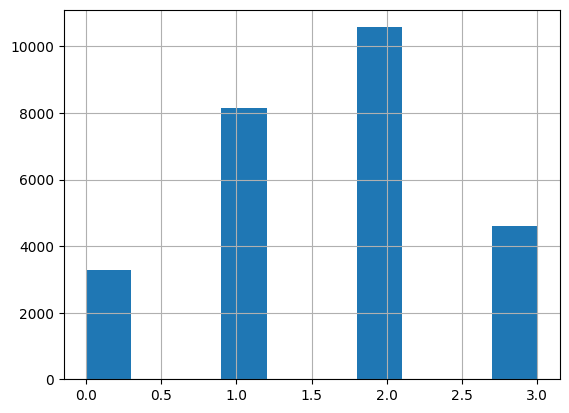

In [ ]:
#plot a hist of xyz concern have two category on non-null and null
df_final['xyz_concern'].hist()

In [ ]:
#select all the object datatype cols and show me
df_final.select_dtypes(include=['object']).columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [ ]:
#apply ordinal encoding to education
df_final['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [ ]:
df_final['age_group'].isnull().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder = LabelEncoder()
df_final['age_encoded'] = label_encoder.fit_transform(df['age_group'])
df_final['race_encoded'] = label_encoder.fit_transform(df['race'])
df_final['sex_encoded'] = label_encoder.fit_transform(df['sex'])


df_test['age_encoded'] = label_encoder.fit_transform(df_test['age_group'])
df_test['race_encoded'] = label_encoder.fit_transform(df_test['race'])
df_test['sex_encoded'] = label_encoder.fit_transform(df_test['sex'])


In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [ ]:
#drop sex, martial status
df_final.drop(['sex', 'marital_status'], axis=1, inplace=True)


In [ ]:
df_test.drop(['sex', 'marital_status'], axis=1, inplace=True)

In [ ]:
#missing values in all cols
df_final.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
income_poverty                  4423
rent_or_own                     2042
employment_status               1463
h

In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
income_poverty                  object
rent_or_own              

In [ ]:
df_final['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [ ]:
#replace nun values in income poverty with <= $75,000, Above Poverty
#df['income_poverty'] = df['income_poverty'].fillna('<= $75,000, Above Poverty')
mapping = {
    'Below Poverty': 0,
    '> $75,000': 1,
    '<= $75,000': 2,
    'Above Poverty': 3
}
df_final['poverty_encoded'] = df_final['income_poverty'].map(mapping)


In [ ]:
df_test['poverty_encoded'] = df_test['income_poverty'].map(mapping)

In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
income_poverty                  object
rent_or_own              

In [ ]:
df_test.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
income_poverty           

In [ ]:
#plot hist for poverty encoded
df_final['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [ ]:
mapping_education = {
    'College Graduate': 3,
    'Some College': 2,
    '12 Years': 1,
    '< 12 Years': 0
}

df_final['education_encoded'] = df_final['education'].map(mapping_education)

In [ ]:
df_test['education_encoded'] = df_test['education'].map(mapping_education)

In [ ]:
#drop age group,education, race, income poverty
df_final.drop(['age_group', 'education', 'race', 'income_poverty'], axis=1, inplace=True)

In [ ]:
df_test.drop(['age_group', 'education', 'race', 'income_poverty'], axis=1, inplace=True)

In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa                      object
household_adults         

In [ ]:
df_final['rent_or_own'].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [ ]:
#display all the cols in the df_final
mapping_rent = {
    'Own': 1,
    'Rent': 0
}

df_final['rent_encodded'] = df_final['rent_or_own'].map(mapping_rent)

In [ ]:
df_test['rent_encodded'] = df_test['rent_or_own'].map(mapping_rent)

In [ ]:
#drop rent or own
# df_final.drop(['rent_or_own'], axis=1, inplace=True)

In [ ]:
# df['employment_status'].value_counts()

In [ ]:
mapping_employment = {
    'Unemployed': 0,
    'Not in Labor Force': 1,
    'Employed': 2
}

df_final['employment_encodded'] = df_final['employment_status'].map(mapping_employment)

In [ ]:
df_test['employment_encodded'] = df_test['employment_status'].map(mapping_employment)

In [ ]:
df_final['employment_industry'].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [ ]:
#drop employment industry and employment occupation
df_final.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True)

In [ ]:
df_test.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True)

<Axes: >

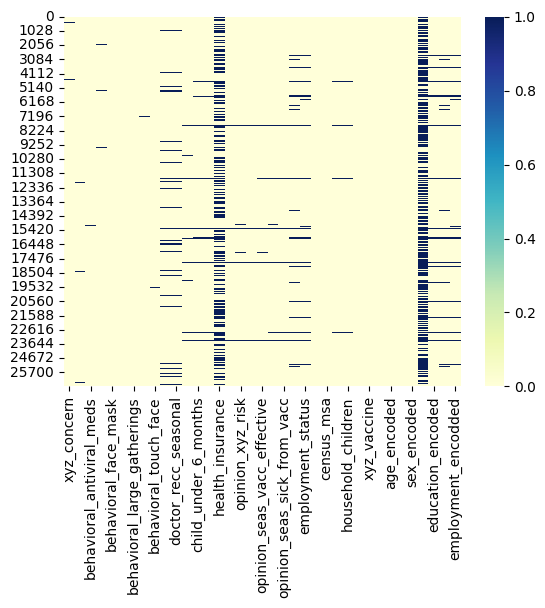

In [ ]:
#create a heat map of all the missing values change the color to orange and white
import seaborn as sns
sns.heatmap(df_final.isnull(), cmap='YlGnBu')


In [ ]:
#find the number of missing values in hsa geo region and censusu
df_final['hhs_geo_region'].isnull().sum()
df_final['census_msa'].isnull().sum()

0

In [ ]:
# show me all the cols with encoded at the end
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa                      object
household_adults         

In [ ]:
df_final['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [ ]:
df_final['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [ ]:
#apply label encoding to census msa
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final['census_encoded'] = le.fit_transform(df['census_msa'])
df_final['region_encoded'] = le.fit_transform(df['hhs_geo_region'])


In [ ]:
df_test['census_encoded'] = le.fit_transform(df_test['census_msa'])
df_test['region_encoded'] = le.fit_transform(df_test['hhs_geo_region'])

In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa                      object
household_adults         

In [ ]:
#drop all the cols that have the dtype object
df_final.drop(['hhs_geo_region', 'census_msa','rent_or_own','employment_status'], axis=1, inplace=True)


In [ ]:
df_test.drop(['hhs_geo_region', 'census_msa','rent_or_own','employment_status'], axis=1, inplace=True)

In [ ]:
df_final.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
respondent_id                    int64
xyz_vaccine                      int64
seasonal_vaccine         

In [ ]:
#drop id
df_final.drop('respondent_id', axis=1, inplace=True)

In [ ]:
df_test.drop('respondent_id', axis=1, inplace=True)

In [ ]:
df_final.shape

(26707, 34)

In [ ]:
df_final.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'xyz_vaccine', 'seasonal_vaccine', 'age_encoded',
       'race_encoded', 'sex_encoded', 'poverty_encoded', 'education_encoded',
       'rent_encodded', 'employment_encodded', 'census_encoded',
       'region_encoded'],
      dtype='object')

In [ ]:
df_test.shape

(26708, 32)

In [ ]:
#missing values in xyz concern
df_final['xyz_concern'].isnull().sum()


92

In [ ]:
#percentage of missing values in all cols
df_final.isnull().sum()/len(df_final)*100

xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
household_adults                0.932340
household_children              0.932340
xyz_vaccine                     0.000000
seasonal_vaccine

In [ ]:
#impute the missing data of  xyz_concern    xyz_knowledge
# behavioral_antiviral_meds
# behavioral_avoidance
# behavioral_face_mask
# behavioral_wash__hands
# behavioral_large_gatherings
# behavioral_outside_home
# behavioral_touch_face      with the median

df_final['xyz_concern'] = df_final['xyz_concern'].fillna(df_final['xyz_concern'].median())
df_final['behavioral_antiviral_meds'] = df_final['behavioral_antiviral_meds'].fillna(df_final['behavioral_antiviral_meds'].median())
df_final['behavioral_avoidance'] = df_final['behavioral_avoidance'].fillna(df_final['behavioral_avoidance'].median())
df_final['behavioral_face_mask'] = df_final['behavioral_face_mask'].fillna(df_final['behavioral_face_mask'].median())
df_final['behavioral_wash_hands'] = df_final['behavioral_wash_hands'].fillna(df_final['behavioral_wash_hands'].median())
df_final['behavioral_large_gatherings'] = df_final['behavioral_large_gatherings'].fillna(df_final['behavioral_large_gatherings'].median())
df_final['behavioral_outside_home'] = df_final['behavioral_outside_home'].fillna(df_final['behavioral_outside_home'].median())
df_final['behavioral_touch_face'] = df_final['behavioral_touch_face'].fillna(df_final['behavioral_touch_face'].median())
df_final['xyz_knowledge'] = df_final['xyz_knowledge'].fillna(df_final['xyz_knowledge'].median())

In [ ]:
#perform the same operations above for df_test
df_test['xyz_concern'] = df_test['xyz_concern'].fillna(df_test['xyz_concern'].median())
df_test['behavioral_antiviral_meds'] = df_test['behavioral_antiviral_meds'].fillna(df_test['behavioral_antiviral_meds'].median())
df_test['behavioral_avoidance'] = df_test['behavioral_avoidance'].fillna(df_test['behavioral_avoidance'].median())
df_test['behavioral_face_mask'] = df_test['behavioral_face_mask'].fillna(df_test['behavioral_face_mask'].median())
df_test['behavioral_wash_hands'] = df_test['behavioral_wash_hands'].fillna(df_test['behavioral_wash_hands'].median())
df_test['behavioral_large_gatherings'] = df_test['behavioral_large_gatherings'].fillna(df_test['behavioral_large_gatherings'].median())
df_test['behavioral_outside_home'] = df_test['behavioral_outside_home'].fillna(df_test['behavioral_outside_home'].median())
df_test['behavioral_touch_face'] = df_test['behavioral_touch_face'].fillna(df_test['behavioral_touch_face'].median())
df_test['xyz_knowledge'] = df_test['xyz_knowledge'].fillna(df_test['xyz_knowledge'].median())


<Axes: >

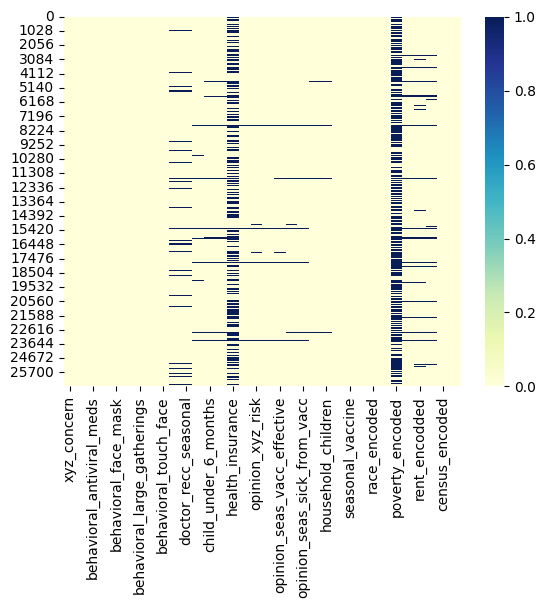

In [ ]:
#heat map for missing values
sns.heatmap(df_final.isnull(), cmap='YlGnBu')

In [ ]:
#apply knn imputer to health insurance
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')

df_imputed= knn.fit_transform(df_final)


In [ ]:
df_test_imputed= knn.fit_transform(df_test)

In [ ]:
df_final_imputed = pd.DataFrame(df_imputed, columns=df_final.columns)

In [ ]:
df_test_imputed = pd.DataFrame(df_test_imputed, columns=df_test.columns)

<Axes: >

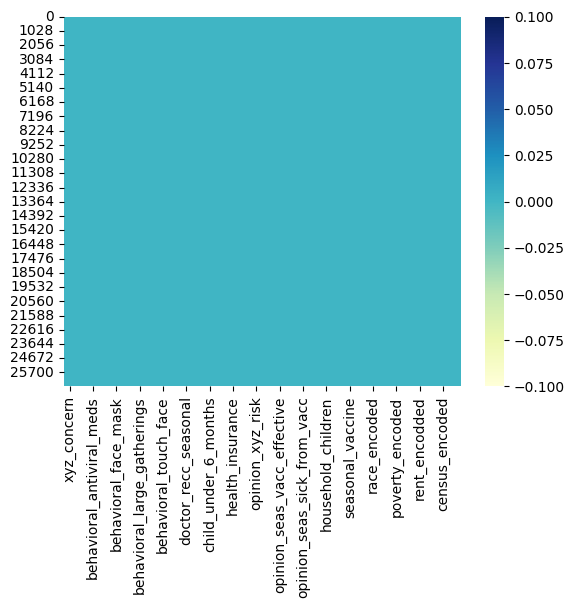

In [ ]:
sns.heatmap(df_final_imputed.isnull(), cmap='YlGnBu')

In [ ]:
df_final_imputed.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,seasonal_vaccine,age_encoded,race_encoded,sex_encoded,poverty_encoded,education_encoded,rent_encodded,employment_encodded,census_encoded,region_encoded
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,8.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,3.0,1.0,2.0,0.0,9.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0,0.0,9.0


<Axes: >

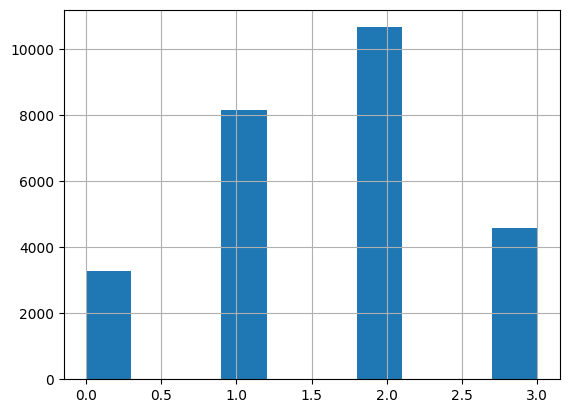

In [ ]:
#plot histogram of xyz concern , xyz knowledge, behavioral antiviral meds
df_final_imputed['xyz_concern'].hist()


In [ ]:
#add xyz concern and xyz knowledeg and create a new col xyz_awareness
df_final_imputed['xyz_awareness'] = df_final_imputed['xyz_concern'] + df_final_imputed['xyz_knowledge']
#drop xyz concern and knowledge
df_final_imputed.drop(['xyz_concern', 'xyz_knowledge'], axis=1, inplace=True)

In [ ]:
df_test_imputed['xyz_awareness'] = df_test_imputed['xyz_concern'] + df_test_imputed['xyz_knowledge']
#drop xyz concern and knowledge
df_test_imputed.drop(['xyz_concern', 'xyz_knowledge'], axis=1, inplace=True)

In [ ]:
#select all the cols with behavioral in the beginning and add all of them together
behavioral_cols = [col for col in df_final_imputed.columns if 'behavioral' in col]
df_final_imputed['behavioral_awareness'] = df_final_imputed[behavioral_cols].sum(axis=1)


In [ ]:
behavioral_cols = [col for col in df_test_imputed.columns if 'behavioral' in col]
df_test_imputed['behavioral_awareness'] = df_test_imputed[behavioral_cols].sum(axis=1)

In [ ]:
#select all the cols with behavioral in the beginning and drop them
behavioral_cols = [col for col in df_final_imputed.columns if 'behavioral' in col]
df_final_imputed.drop(behavioral_cols, axis=1, inplace=True)

In [ ]:
behavioral_cols = [col for col in df_test_imputed.columns if 'behavioral' in col]
df_test_imputed.drop(behavioral_cols, axis=1, inplace=True)

In [ ]:
#find shape
df_final_imputed.shape

(26707, 26)

In [ ]:
df_test_imputed.shape

(26708, 24)

In [ ]:
#show all the cols
df_final_imputed.columns



Index(['doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'xyz_vaccine', 'seasonal_vaccine', 'age_encoded',
       'race_encoded', 'sex_encoded', 'poverty_encoded', 'education_encoded',
       'rent_encodded', 'employment_encodded', 'census_encoded',
       'region_encoded', 'xyz_awareness'],
      dtype='object')

In [ ]:
#add doctor recc xyz, opininion xyz effectiveness, opinion xyz risk- sick from xyz and create a new col called xyz thinking
df_test_imputed['xyz_thinking'] = df_test_imputed['doctor_recc_xyz'] + df_test_imputed['opinion_xyz_vacc_effective']+ df_test_imputed['opinion_xyz_risk'] - df_test_imputed['opinion_xyz_sick_from_vacc']
#drop xyz thinking, xyz doctor recc xyz , opinion xyz vacc effective, opinion xyz risk, sick from vacc
df_test_imputed.drop(['doctor_recc_xyz', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'], axis=1, inplace=True)



In [ ]:
#do the same operation for df test imputed
df_final_imputed['xyz_thinking'] = df_final_imputed['doctor_recc_xyz'] + df_final_imputed['opinion_xyz_vacc_effective']+ df_final_imputed['opinion_xyz_risk'] - df_final_imputed['opinion_xyz_sick_from_vacc']
#drop xyz thinking, xyz doctor recc xyz , opinion xyz vacc effective, opinion xyz risk, sick from vacc
df_final_imputed.drop(['doctor_recc_xyz', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'], axis=1, inplace=True)

In [ ]:
# repeat the above step for seasonal
#add doctor recc xyz, opininion xyz effectiveness, opinion xyz risk- sick from xyz and create a new col called xyz thinking
df_final_imputed['seasonal_thinking'] = df_final_imputed['doctor_recc_seasonal'] + df_final_imputed['opinion_seas_vacc_effective']+ df_final_imputed['opinion_seas_risk'] - df_final_imputed['opinion_seas_sick_from_vacc']
#drop xyz thinking, xyz doctor recc xyz , opinion xyz vacc effective, opinion xyz risk, sick from vacc
df_final_imputed.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)



In [ ]:
df_test_imputed['seasonal_thinking'] = df_test_imputed['doctor_recc_seasonal'] + df_test_imputed['opinion_seas_vacc_effective']+ df_test_imputed['opinion_seas_risk'] - df_test_imputed['opinion_seas_sick_from_vacc']
df_test_imputed.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)

In [ ]:
#add house hold adults and children and create a new col called family members
df_final_imputed['family_members'] = df_final_imputed['household_adults'] + df_final_imputed['household_children']
#drop house hold adults and children
df_final_imputed.drop(['household_adults', 'household_children'], axis=1, inplace=True)

In [ ]:
df_test_imputed['family_members'] = df_test_imputed['household_adults'] + df_test_imputed['household_children']
#drop house hold adults and children
df_test_imputed.drop(['household_adults', 'household_children'], axis=1, inplace=True)

In [ ]:
#find shape
df_final_imputed.shape

(26707, 19)

In [ ]:
df_test_imputed.shape

(26708, 17)

In [ ]:
##Applying logistics regression
#create X train out of df_final_imputed with out seasonal vaccine
X = df_final_imputed.drop(['seasonal_vaccine', 'xyz_vaccine'], axis=1)
#create y train out of df_final_imputed with seasonal vaccine
#

In [ ]:
y = df_final_imputed[['xyz_vaccine','seasonal_vaccine']]

In [ ]:
# from skmultilearn.problem_transform import BinaryRelevance
# from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Assuming multinomial features #import f1 score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
clf_MNB = OneVsRestClassifier(MultinomialNB())


In [ ]:
clf_MNB.fit(X_train_scaled, y_train)


OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
y_pred_proba = clf_MNB.predict_proba(X_test_scaled)


In [ ]:
y_pred = pd.DataFrame(y_pred_proba)

In [ ]:
y_pred.head()

,0,1
0,0.193088,0.548524
1,0.391186,0.550223
2,0.162432,0.235421
3,0.255069,0.658257
4,0.332115,0.697443


In [ ]:
# Predict on the test set
y_pred = clf_MNB.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming}")
print(f"F1 Score (Micro): {f1}")

Accuracy: 0.5125421190565331
Hamming Loss: 0.2901535005615874
F1 Score (Micro): 0.440028901734104


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=50)


In [ ]:
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=50)

In [ ]:
y_pred_proba = clf.predict_proba(X_test)


In [ ]:
y_pred_csv = pd.DataFrame(y_pred_proba)

ValueError: Must pass 2-d input. shape=(2, 5342, 2)

In [ ]:
y_pred_cr = clf.predict(X_test)


In [ ]:
# Predict on the test set
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cr)
hamming = hamming_loss(y_test, y_pred_cr)
f1 = f1_score(y_test, y_pred_cr, average='micro')

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming}")
print(f"F1 Score (Micro): {f1}")

Accuracy: 0.623736428304006
Hamming Loss: 0.22023586671658554
F1 Score (Micro): 0.6411468659447918


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
y = df_final_imputed['xyz_vaccine']
X = df_final_imputed.drop(['seasonal_vaccine', 'xyz_vaccine'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_proba = model.predict_proba(X_test)


In [ ]:
y_pred_proba_xyz = pd.DataFrame(y_pred_proba)

In [ ]:
output_xyz = model.predict_proba(df_test_imputed)

In [ ]:
output_xyz_df = pd.DataFrame(output_xyz)

In [ ]:
#export this as output_xyz


In [ ]:
#drop the first col
output_xyz_df.drop(output_xyz_df.columns[0], axis=1, inplace=True)

In [ ]:
#convert output xyz dtype to integres


In [ ]:
output_xyz_df.to_csv('output_xyz.csv', index=False)

In [ ]:
output_xyz_df.shape

(26708, 1)

In [ ]:
# Probabilities of the positive class
y_pred_proba_positive = y_pred_proba[:, 1]


In [ ]:
# Binary predictions based on threshold
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_positive)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.8150505428678397
ROC AUC Score: 0.7665906092159779


In [ ]:
y = df_final_imputed['seasonal_vaccine']
X = df_final_imputed.drop(['seasonal_vaccine', 'xyz_vaccine'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_pred_proba_seasonal = pd.DataFrame(y_pred_proba)

In [ ]:
output_seasonal = model.predict_proba(df_test_imputed)

In [ ]:
output_seasonal_df = pd.DataFrame(output_seasonal)

In [ ]:
output_seasonal_df.shape

(26708, 2)

In [ ]:
output_seasonal_df.head()

,0,1
0,0.649493,0.350507
1,0.940299,0.059701
2,0.433973,0.566027
3,0.160675,0.839325
4,0.375518,0.624482


In [ ]:
#from out seasonal drop first col
output_seasonal_df.drop(output_seasonal_df.columns[0], axis=1, inplace=True)

In [ ]:
output_seasonal_df.shape

(26708, 1)

In [ ]:
#covert the dtype to str


In [ ]:
output_seasonal_df.to_csv('output_seasonal.csv', index=False)

In [ ]:
output_seasonal_df.head()

,1
0,0.3505070697431311
1,0.05970106020173039
2,0.5660265369226085
3,0.8393251164959402
4,0.6244819920465706


In [ ]:
y_pred_proba_positive = y_pred_proba[:, 1]

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba_positive)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.7669412205166605
ROC AUC Score: 0.8337210784153921


In [ ]:
#concate y_pred_proba and y_pred_seasonal and start the index from 26707
test_pred = pd.concat([y_pred_proba_xyz, y_pred_proba_seasonal], axis=1)

In [ ]:
df_final = pd.concat([output_seasonal_df, output_xyz_df])

In [ ]:
df_final.shape

(53416, 1)

In [ ]:
df_final.head()

,0,1
0,0.649493,0.350507
1,0.940299,0.059701
2,0.433973,0.566027
3,0.160675,0.839325
4,0.375518,0.624482
